<a href="https://colab.research.google.com/github/SofiaQuiroga/Repositorio_Taller4_BDML/blob/main/Neuronas_con_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style type="text/css">

.responsive {
 width: 100%;
 height: 25%;
}

.list-group-item.active, .list-group-item.active:focus, .list-group-item.active:hover {
    z-index: 2;
    color: #fff;
    background-color: #1B175E;
    border-color: #337ab7;
}
h1, h2, h3, h4 {
    color: #000002;
    background-color: #1B175E;
    background-image:
      linear-gradient(to right,
       #fff, #ffff00
     );

}

h1, h2, h3, h4, p {
    color: #000002;
}

a {
    color: #1B175E;
}
</style>


In [1]:
rm(list = ls())


In [2]:
install.packages('keras')
library(keras)

# Cargar pacman (contiene la funci?n p_load)
#install.packages('pacman')
#library(pacman) 

# Cargar las librer?as listadas e instalarlas en caso de ser necesario
#p_load(tidyverse, janitor, tm, stringi, tidytext, stopwords, wordcloud2, udpipe,
       #ggcorrplot, keras) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Modelo
Vamos a crear una red neuronal que solo tenga una hidden layer. Vamos a usar la siguiente regla del pulgar para escoger el número de neuronas:
$$N_h=\frac{N_s}{\alpha\cdot(N_i+N_o)}$$
En donde:
- $N_i:$ Es el número de las neuronas inputs (número de columnas).
- $N_o:$ Número de neuronas en la capa de salida (número de categorías posibles).
- $N_s:$ Número de observaciones.
- $\alpha:$ Factor arbitrario entre 2 y 10.


In [3]:
# Importamos tf_idf_test tf_idf_train
load("tf_idf_test.rds")
load("tf_idf_train.rds")
load("train_clean.rds")
load("test_clean.rds")

In [6]:
sum(is.na(tf_idf_test$name))

[1] 0

In [7]:
table(train_clean$name)


   1    2    3 
3468 2873 3000 

In [4]:
train_Y <- factor(train_clean$name)
train_Y <- model.matrix(~train_Y+0)
head(train_Y)
dim(train_Y)
class(train_Y)
 

,train_Y1,train_Y2,train_Y3
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1


[1] 9341    3

[1] "matrix" "array"

In [5]:
train_X <- as.matrix(tf_idf_train)
dim(train_X)

[1]  9341 17020

In [8]:
test_X <- as.matrix(tf_idf_test)
dim(test_X)

[1] 1499 6638

In [9]:
test_Y <- factor(train_clean$name)
test_Y <- model.matrix(~test_Y+0)
dim(test_Y)

[1] 9341    3

In [10]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 3, activation = 'relu', input_shape = c(17020)) %>% 
  layer_dense(units = 3, activation = 'softmax')

In [11]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 3)                       51063       
 dense (Dense)                      (None, 3)                       12          
Total params: 51,075
Trainable params: 51,075
Non-trainable params: 0
________________________________________________________________________________


In [38]:

model2 <- keras_model_sequential() 

model2 %>%
layer_dense(units = 500, activation = 'relu', input_shape = c(17020)) %>% 
layer_dense(units = 50, activation = 'relu') %>%
layer_dense(units = 3, activation = 'softmax')

In [39]:
summary(model2)

Model: "sequential_10"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_29 (Dense)                   (None, 500)                     8510500     
 dense_28 (Dense)                   (None, 50)                      25050       
 dense_27 (Dense)                   (None, 3)                       153         
Total params: 8,535,703
Trainable params: 8,535,703
Non-trainable params: 0
________________________________________________________________________________


In [40]:
model2 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = c('accuracy')
)

In [41]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 3)                       51063       
 dense (Dense)                      (None, 3)                       12          
Total params: 51,075
Trainable params: 51,075
Non-trainable params: 0
________________________________________________________________________________


In [45]:
history2 <- model2 %>% fit(
  train_X, train_Y, 
  epochs =30 , 
  batch_size = 2^8,
  validation_split = 0.2
)

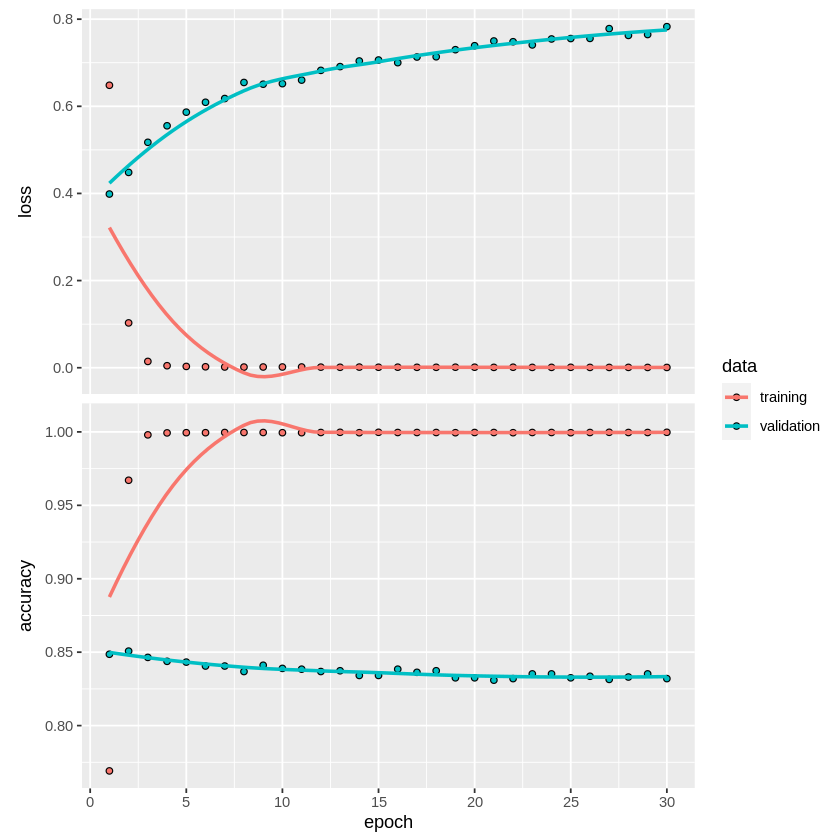

In [44]:
plot(history2)

In [33]:
model2 %>% evaluate(test_X, test_Y)

ERROR: ignored

NUEVO INTENTO CON DROPOUT

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 3)                       51063       
 dense (Dense)                      (None, 3)                       12          
Total params: 51,075
Trainable params: 51,075
Non-trainable params: 0
________________________________________________________________________________


In [10]:
model33 <- keras_model_sequential() 

model33 %>%
layer_dense(units = 10, activation = 'relu', input_shape = ncol(train_X)) %>% 
layer_dropout(rate = 0.3) %>%
layer_dense(units = 7, activation = 'relu') %>%
layer_dropout(rate = 0.2) %>%
layer_dense(units = 3, activation = 'softmax')
summary(model33)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_2 (Dense)                    (None, 10)                      170210      
 dropout_1 (Dropout)                (None, 10)                      0           
 dense_1 (Dense)                    (None, 7)                       77          
 dropout (Dropout)                  (None, 7)                       0           
 dense (Dense)                      (None, 3)                       24          
Total params: 170,311
Trainable params: 170,311
Non-trainable params: 0
________________________________________________________________________________


In [11]:
model33 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = c('accuracy')
)

In [12]:
history3 <- model33 %>% fit(
  train_X, train_Y, 
  epochs = 20, 
  batch_size = 128,
  validation_split = 0.2
)

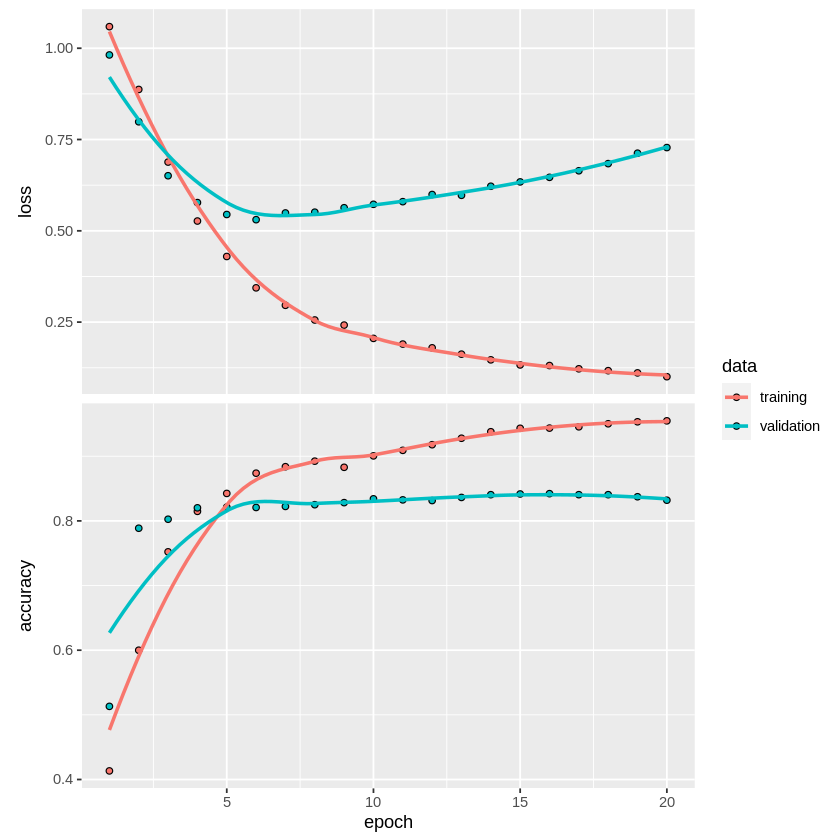

In [80]:
plot(history3)

In [83]:
y_hat <- model33 %>% predict(test_X) %>% k_argmax()


ERROR: ignored

¿Que significa que la muestra de validación sea más alta que la de entrenamiento?

In [ ]:
model %>% evaluate(X_test, y_test)

loss categorical_accuracy 
           1.7529806            0.6826923

In [ ]:
y_hat <- model  %>% predict(X_test) %>% k_argmax()

In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
confusionMatrix(data = factor(as.numeric(y_hat), levels = 1:5), 
  reference = factor(data_clean$calificacion[-train_indices], levels = 1:5))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1   1   0   0   0   4
         2   0   0   0   0   0
         3   0   0   0   0   0
         4   0   0   0   0   0
         5  18  17  21  39 212

Overall Statistics
                                         
               Accuracy : 0.6827         
                 95% CI : (0.6279, 0.734)
    No Information Rate : 0.6923         
    P-Value [Acc > NIR] : 0.6685         
                                         
                  Kappa : 0.0016         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity          0.052632  0.00000  0.00000    0.000  0.98148
Specificity          0.986348  1.00000  1.00000    1.000  0.01042
Pos Pred Value       0.200000      NaN      NaN      NaN  0.69055
Neg Pred Value       0.941368  0.94551  0.93269    0.875  0.20000
Prevalence

In [ ]:
# Sensitivity = Recall
# Specificity = TNR

[1] 0.25

LASSO

In [60]:
install.packages("glmnet")
library(glmnet)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-6



In [ ]:
x <- scale(model.matrix(Salary ~ . - 1, data = tf_idf_train))
y <- Gitters$Salary
cvfit <- cv.glmnet(x[-testid, ], y[-testid],
                   type.measure = "mae")
cpred <- predict(cvfit, x[testid, ], s = "lambda.min")

# MAE
mean(abs(y[testid] - cpred))